## Linear Regression for price and Sqft_living 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_excel("D:/ML/dataset/Linear Regression.xlsx",sheet_name=0)

In [6]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [27]:
a = dataset.iloc[:, :1]
b = dataset.iloc[:,1:2]

In [30]:
a.shape

(21613, 1)

In [31]:
b.shape

(21613, 1)

In [10]:
dataset=dataset.drop(columns=['bedrooms','bathrooms','floors'])

In [11]:
dataset.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [13]:
dataset.dtypes

price          int64
sqft_living    int64
dtype: object

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21613 non-null  int64
 1   sqft_living  21613 non-null  int64
dtypes: int64(2)
memory usage: 337.8 KB


In [15]:
dataset.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016149B84088>,
      dtype=object)

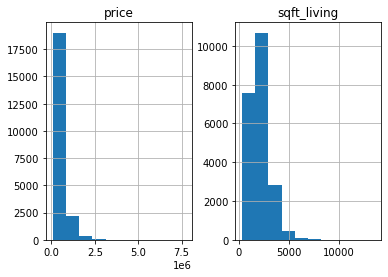

In [16]:
dataset.hist()

In [17]:
dataset.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016149E4A308>,
      dtype=object)

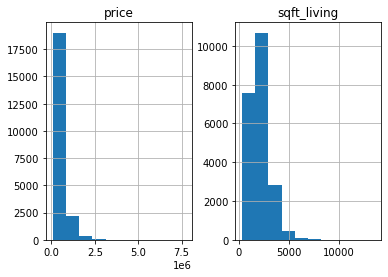

In [18]:
dataset.hist()

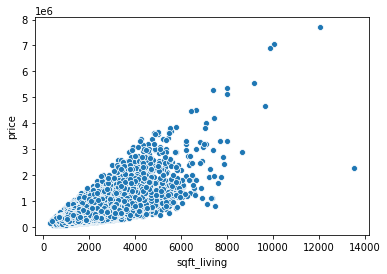

In [19]:
sns.scatterplot(dataset['sqft_living'],dataset['price'])

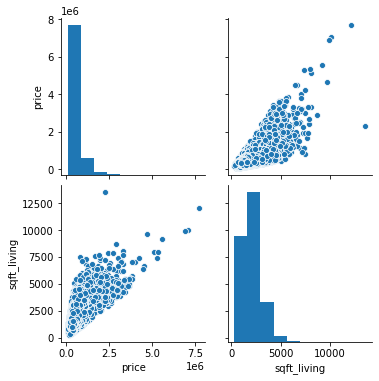

In [20]:
sns.pairplot(dataset)

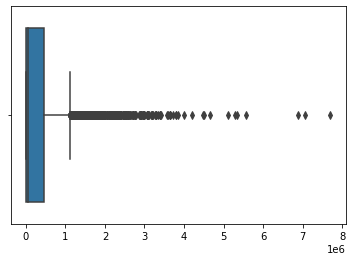

In [21]:
sns.boxplot(dataset)

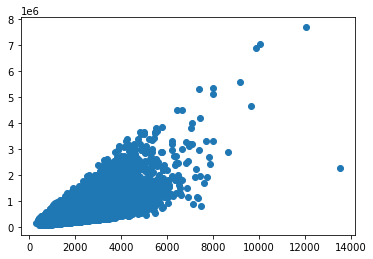

In [81]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,:-1]
plt.scatter(X,y)
plt.show()

In [89]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [90]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
linear = LinearRegression()


In [105]:
X_train.shape

(17290, 1)

In [106]:
y_train.shape

(17290, 1)

In [107]:
linear.fit(X_train,y_train)

LinearRegression()

In [108]:
linear.coef_

array([[280.67382569]])

In [109]:
linear.intercept_

array([-42568.70358496])

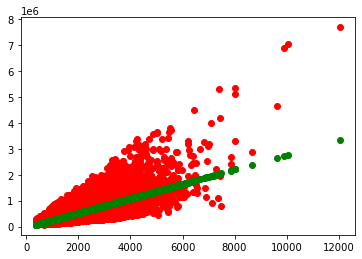

In [110]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_train,linear.predict(X_train),color='green')
plt.show()

In [111]:
y_pred = linear.predict(X_test)

In [112]:
y_pred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

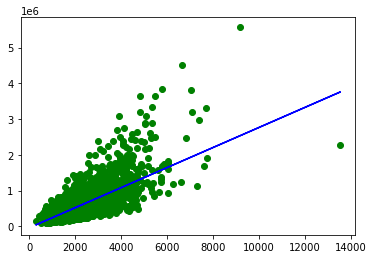

In [113]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,linear.predict(X_test), color = 'blue')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5031163723285275
The RMSE value is........ 263380.00189817196


In [115]:
unseen_pred=linear.predict(np.array([[2000]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[518778.94779267]]


In [116]:
dataset.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
